<a href="https://colab.research.google.com/github/rafaSouzaLima/trabalho2-anisio/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de Dados escolhida

A base de dados escolhida é uma [amostra](https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset) que contém dados provenientes da API do Spotify, que extrai dados das músicas mais populares e das músicas menos populares. Para essa análise serão utilizadas as músicas mais populares.

A intenção dessa análise é analisar a relação da popularidade de faixas com seu volume e energia geral, e outras variáveis para entender o que pode indicar a escolha de músicas pela maioria das pessoas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks"

# importar o arquivo social_media_entertainment_data.csv para um DataFrame
df = pd.read_csv(path + '/high_popularity_spotify_data.csv')

df

Mounted at /content/drive


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [3]:
df.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')

Como pode-se ver essa é uma amostra de 1686 músicas, com 29 colunas de dados a respeito dessas músicas. Para melhor entendimento dos detalhes pode-se traduzir o conteúdo dessas colunas.

In [4]:
# Dicionário de mapeamento de colunas
colunas_mapeadas = {
    'energy': 'Energia',
    'tempo': 'Tempo',
    'danceability': 'Dançabilidade',
    'playlist_genre': 'Gênero da Playlist',
    'loudness': 'Volume (Loudness)',
    'liveness': 'Vivacidade',
    'valence': 'Valência',
    'track_artist': 'Artista da Faixa',
    'time_signature': 'Assinatura de Tempo',
    'speechiness': 'Proporção de Fala',
    'track_popularity': 'Popularidade da Faixa',
    'track_href': 'Link da Faixa',
    'uri': 'URI',
    'track_album_name': 'Nome do Álbum',
    'playlist_name': 'Nome da Playlist',
    'analysis_url': 'URL da Análise',
    'track_id': 'ID da Faixa',
    'track_name': 'Nome da Faixa',
    'track_album_release_date': 'Data de Lançamento do Álbum',
    'instrumentalness': 'Proporção Instrumental',
    'track_album_id': 'ID do Álbum',
    'mode': 'Modo',
    'key': 'Tom (Key)',
    'duration_ms': 'Duração (ms)',
    'acousticness': 'Acústica',
    'id': 'ID',
    'playlist_subgenre': 'Subgênero da Playlist',
    'type': 'Tipo',
    'playlist_id': 'ID da Playlist'
}

# Renomear as colunas do dataframe
df = df.rename(columns=colunas_mapeadas)

# Mostrar as primeiras 10 linhas do dataframe
df.head(10)

,Energia,Tempo,Dançabilidade,Gênero da Playlist,Volume (Loudness),Vivacidade,Valência,Artista da Faixa,Assinatura de Tempo,Proporção de Fala,...,Proporção Instrumental,ID do Álbum,Modo,Tom (Key),Duração (ms),Acústica,ID,Subgênero da Playlist,Tipo,ID da Playlist
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
5,0.582,116.712,0.700,pop,-5.960,0.0881,0.785,Chappell Roan,4,0.0356,...,0.000000,1WAjjRMfZjEXtB0lQrAw6Q,0,11,218424,0.0502,0WbMK4wrZ1wFSty9F7FCgu,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
6,0.561,150.069,0.669,pop,-6.538,0.0954,0.841,Addison Rae,4,0.0411,...,0.009620,0XA403JTounqFh2owquBXu,1,10,169698,0.4950,6MzofobZt2dm0Kf1hTThFz,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
7,0.247,148.101,0.467,pop,-12.002,0.1700,0.126,Billie Eilish,4,0.0431,...,0.000271,7aJuG4TFXa2hmE4z1yxc3n,0,6,261467,0.6120,3QaPy1KgI7nu9FJEQUgn6h,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
8,0.416,94.926,0.492,pop,-10.439,0.2030,0.297,Gigi Perez,4,0.0254,...,0.000086,4DWrYvfGXRE8ko5ZxlIpit,1,11,211979,0.6860,0UYnhUfnUj5adChuAXvLUB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
9,0.722,119.973,0.769,pop,-5.485,0.1110,0.570,"The Weeknd, Playboi Carti",4,0.0507,...,0.000003,2IRxVVqbSbqHJo8Zx50LYn,0,11,256000,0.0584,1Es7AUAhQvapIcoh3qMKDL,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


# Análise Descritiva
Para a pesquisa feita, iremos utilizar apenas alguns desses dados, sendo as seguintes colunas:
- Energia: Uma medida de intensidade e atividade. Normalmente, as músicas energéticas parecem rápidas, altas e barulhentas;
- Tempo: Velocidade do som, medida em Batidas por minuto (BPM);
- Volume (Loudness): O volume geral de uma faixa em decibéis (dB). Valores mais altos indicam faixas mais altas em geral;
- Proporção de Fala: Mede a presença de palavras faladas;
- Proporção Instrumental: A probabilidade de uma faixa não conter vocais. Valores próximos de 1.0 sugerem faixas exclusivamente instrumentais;
- Popularidade da Faixa: Uma pontuação (0–100) calculada com base no número total de streams em relação a outras músicas;
- Valência: A positividade musical geral (emoção) de uma música. Alta valência parece feliz; baixa valência soa triste ou irritado.

In [5]:
colunas_escolhidas = [
    'Energia',
    'Tempo',
    'Volume (Loudness)',
    'Proporção de Fala',
    'Proporção Instrumental',
    'Nome da Faixa',
    'Artista da Faixa',
    'Popularidade da Faixa',
    'Valência',
]

df = df[colunas_escolhidas]
df.head(10)

,Energia,Tempo,Volume (Loudness),Proporção de Fala,Proporção Instrumental,Nome da Faixa,Artista da Faixa,Popularidade da Faixa,Valência
0,0.592,157.969,-7.777,0.0304,0.000000,Die With A Smile,"Lady Gaga, Bruno Mars",100,0.535
1,0.507,104.978,-10.171,0.0358,0.060800,BIRDS OF A FEATHER,Billie Eilish,97,0.438
2,0.808,108.548,-4.169,0.0368,0.000000,That’s So True,Gracie Abrams,93,0.372
3,0.910,112.966,-4.070,0.0634,0.000000,Taste,Sabrina Carpenter,81,0.786
4,0.783,149.027,-4.477,0.2600,0.000000,APT.,"ROSÉ, Bruno Mars",98,0.939
5,0.582,116.712,-5.960,0.0356,0.000000,"Good Luck, Babe!",Chappell Roan,94,0.785
6,0.561,150.069,-6.538,0.0411,0.009620,Diet Pepsi,Addison Rae,88,0.841
7,0.247,148.101,-12.002,0.0431,0.000271,WILDFLOWER,Billie Eilish,93,0.126
8,0.416,94.926,-10.439,0.0254,0.000086,Sailor Song,Gigi Perez,71,0.297
9,0.722,119.973,-5.485,0.0507,0.000003,Timeless (with Playboi Carti),"The Weeknd, Playboi Carti",92,0.570


In [ ]:
df_nulos = df.isnull().sum()

percentual_df_nulos = (df_nulos / len(df)) * 100

tabela_df_nulos = pd.DataFrame({
    'Total de Valores Nulos' : df_nulos,
    'Percentual de nulos (%)' : percentual_df_nulos
})

tabela_df_nulos

,Total de Valores Nulos,Percentual de nulos (%)
Energia,0,0.0
Tempo,0,0.0
Volume (Loudness),0,0.0
Proporção de Fala,0,0.0
Proporção Instrumental,0,0.0
Nome da Faixa,0,0.0
Artista da Faixa,0,0.0
Popularidade da Faixa,0,0.0
Valência,0,0.0


Como pode ser visto, as colunas escolhidas não possuem porcentagem alguma de nulidade, garantindo a validade dos dados apresentados. Além disso podemos analisar as estatísticas gerais dessas variáveis escolhidas:

In [ ]:
# Estatísticas gerais dessa amostra
df.describe()

,Energia,Tempo,Volume (Loudness),Proporção de Fala,Proporção Instrumental,Popularidade da Faixa,Valência
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,-6.704131,0.100926,0.041520,75.806050,0.525737
std,0.184908,27.066029,3.377068,0.099748,0.156556,6.032532,0.236113
min,0.001610,49.305000,-43.643000,0.023200,0.000000,68.000000,0.034800
25%,0.551000,100.058750,-7.950250,0.037900,0.000000,71.000000,0.339000
50%,0.689000,120.001000,-5.974500,0.058100,0.000006,75.000000,0.528000
75%,0.807000,136.833500,-4.687250,0.118000,0.000814,79.000000,0.720000
max,0.990000,209.688000,1.295000,0.848000,0.971000,100.000000,0.978000


Além disso, é importante entender a distribuição dos dados para essas variáveis;

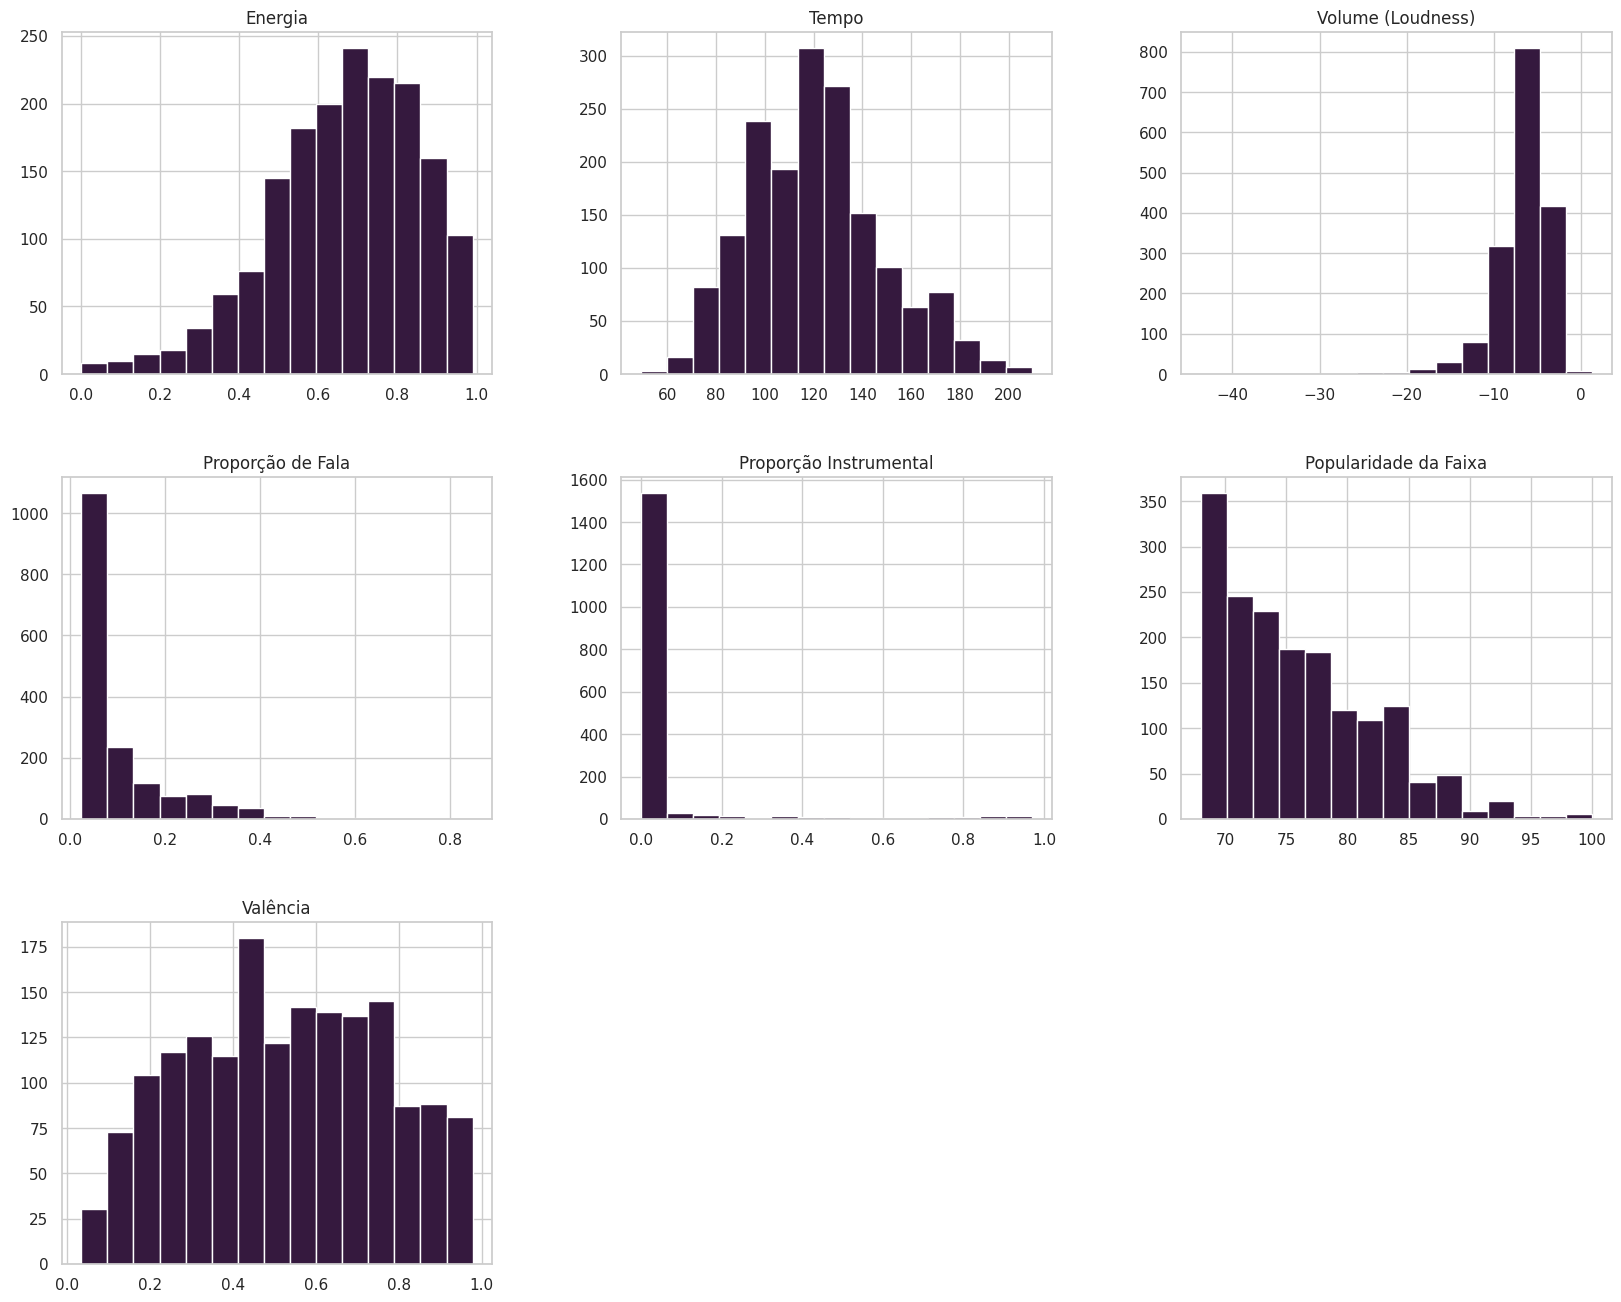

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

Como pode-se ver existem algumas variáveis que o histograma está demasiadamente concentrado, o que indica a elevada presença de `outliers`, sendo as variáveis:
- Volume;
- Proporção de Fala;
- Proporção Instrumental.

Isso pode ser visto ao plotar o Boxplot:


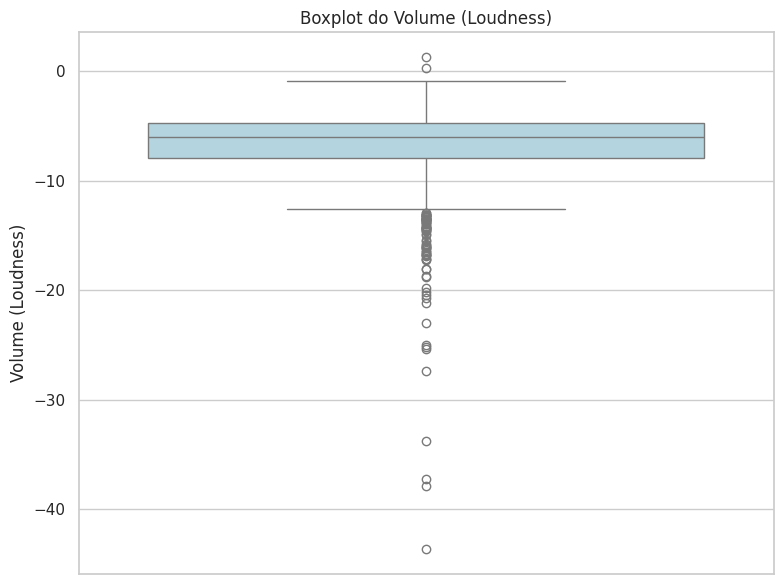

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Volume (Loudness)', data=df, color='lightblue')
plt.title('Boxplot do Volume (Loudness)')
plt.ylabel('Volume (Loudness)')

# Exibir o gráfico
plt.tight_layout()
plt.show()

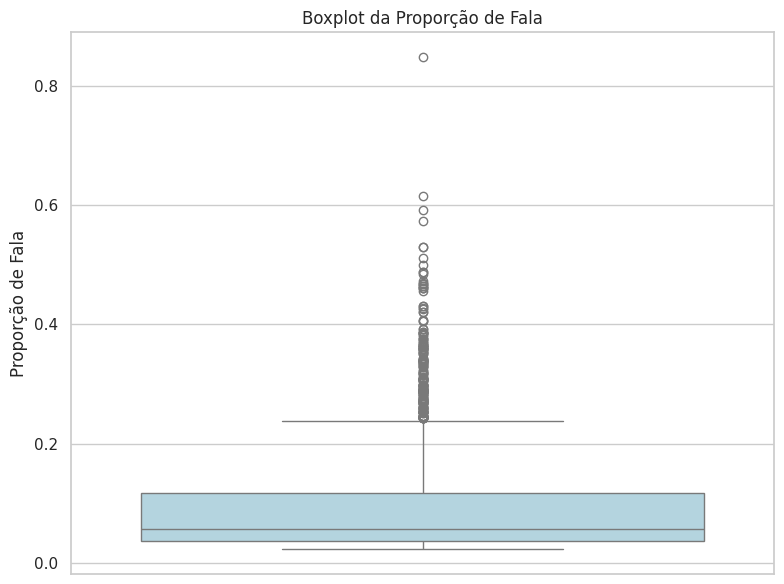

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Proporção de Fala', data=df, color='lightblue')
plt.title('Boxplot da Proporção de Fala')
plt.ylabel('Proporção de Fala')

# Exibir o gráfico
plt.tight_layout()
plt.show()

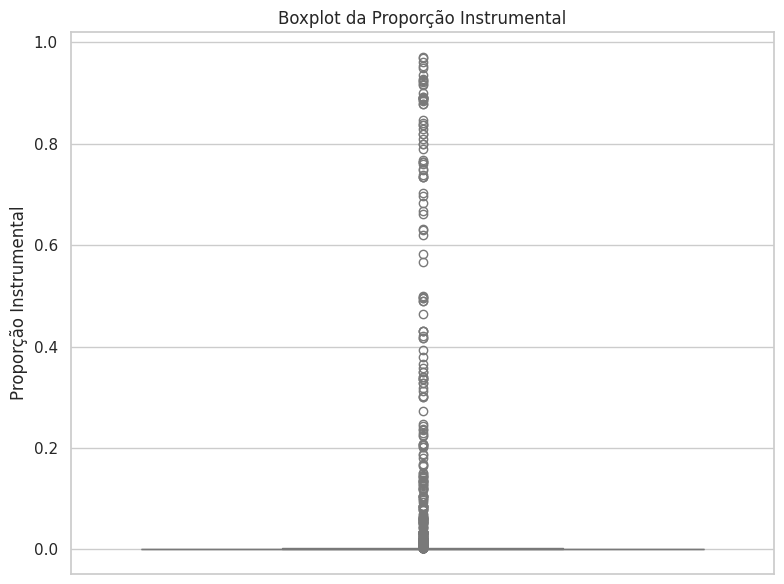

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Proporção Instrumental', data=df, color='lightblue')
plt.title('Boxplot da Proporção Instrumental')
plt.ylabel('Proporção Instrumental')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Para melhorar a análise poderiam remover os `outliers` em forma de buscar um determinado padrão, mas é preciso analisar a característica de cada um:
- Volume: É dado em `dB` (mais especificadamente `dbFS`), e é um tipo de unidade que é logarítmico;
- Proporção de Fala: Valor entre 0 e 1 que indica a proporção de palavras presentes na música;
- Proporção Instrumental: Valor entre 0 e 1 que indica a proporção de instrumentalidade presente na música.

Isso indica que poucas diferenças entre o Volume podem significar muito na intensidade do som de uma música, principalmente em valores próximos do 0. Logo valores muito abaixo são de músicas extremamente baixas e quase inaudíveis. Além disso, tanto a proporção de fala e instrumental raramente chegam próximo do valor 1, indicando que a presença dos dois não é majoritária em uma música e beira valores mais baixos.

Para melhorar a visualização dos dados, vamos excluir os `outliers` desnecessários, para entendermos melhor a amostra.

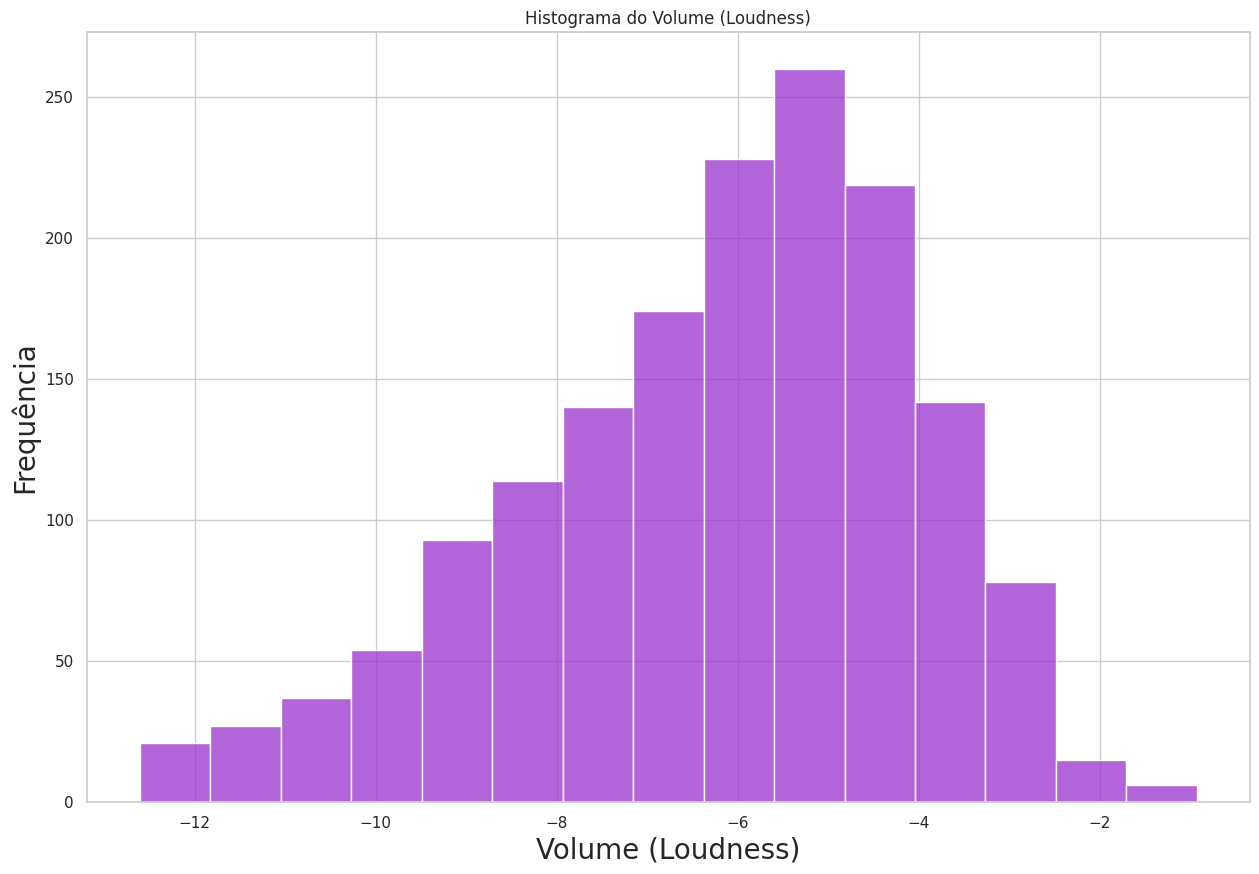

Total de linhas: 1686
Total sem Outliers: 1608


In [10]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = df['Volume (Loudness)'].quantile(0.25)
Q3 = df['Volume (Loudness)'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

filter = (df['Volume (Loudness)'] >= limite_inferior) & (df['Volume (Loudness)'] <= limite_superior)
df_sem_outliers = df.loc[filter]

# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=df_sem_outliers, x='Volume (Loudness)', bins=15, color='darkorchid')

plt.title('Histograma do Volume (Loudness)')
plt.xlabel('Volume (Loudness)', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

print(f'Total de linhas: {len(df)}')
print(f'Total sem Outliers: {len(df_sem_outliers)}')

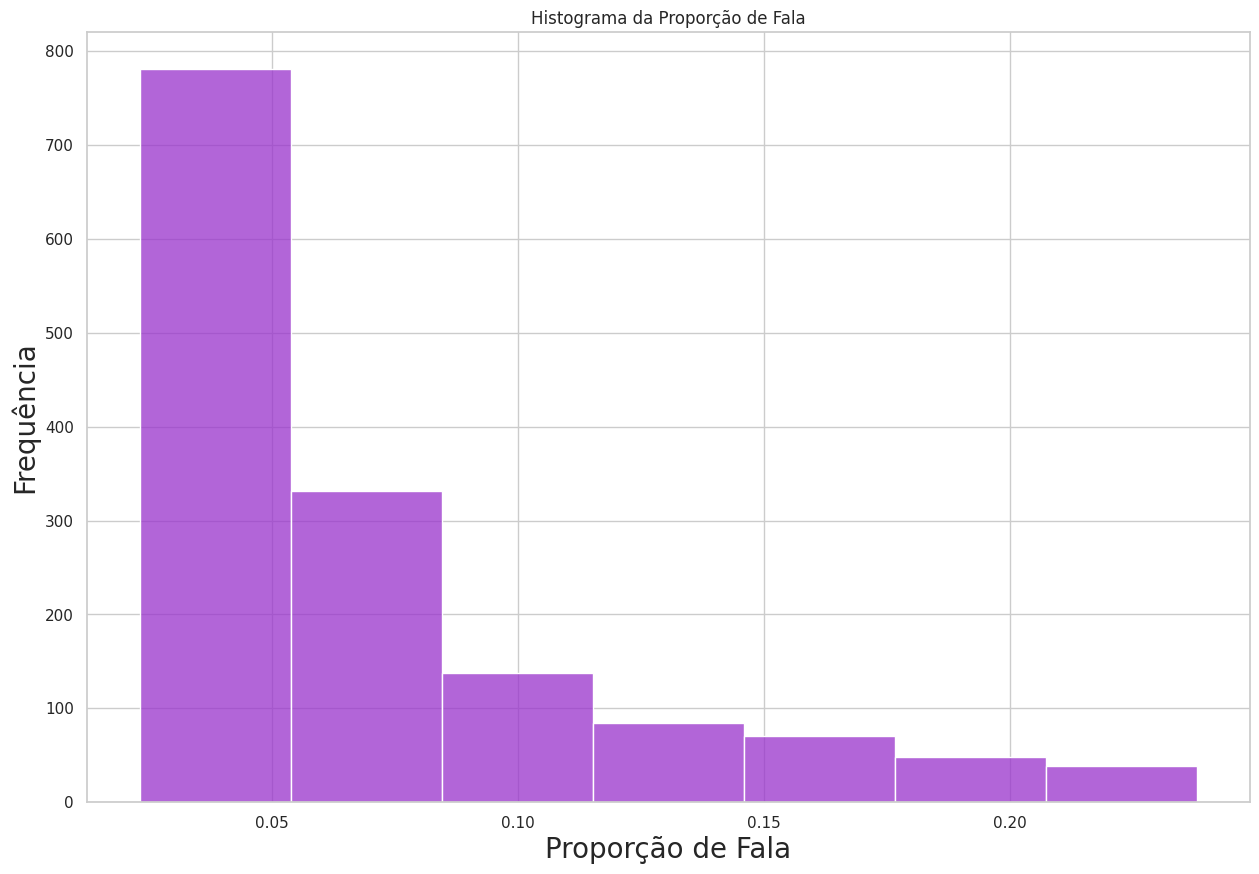

Total de linhas: 1686
Total sem Outliers: 1492


In [ ]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = df['Proporção de Fala'].quantile(0.25)
Q3 = df['Proporção de Fala'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

filter = (df['Proporção de Fala'] >= limite_inferior) & (df['Proporção de Fala'] <= limite_superior)
df_sem_outliers = df.loc[filter]

# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=df_sem_outliers, x='Proporção de Fala', bins=7, color='darkorchid')

plt.title('Histograma da Proporção de Fala')
plt.xlabel('Proporção de Fala', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

print(f'Total de linhas: {len(df)}')
print(f'Total sem Outliers: {len(df_sem_outliers)}')

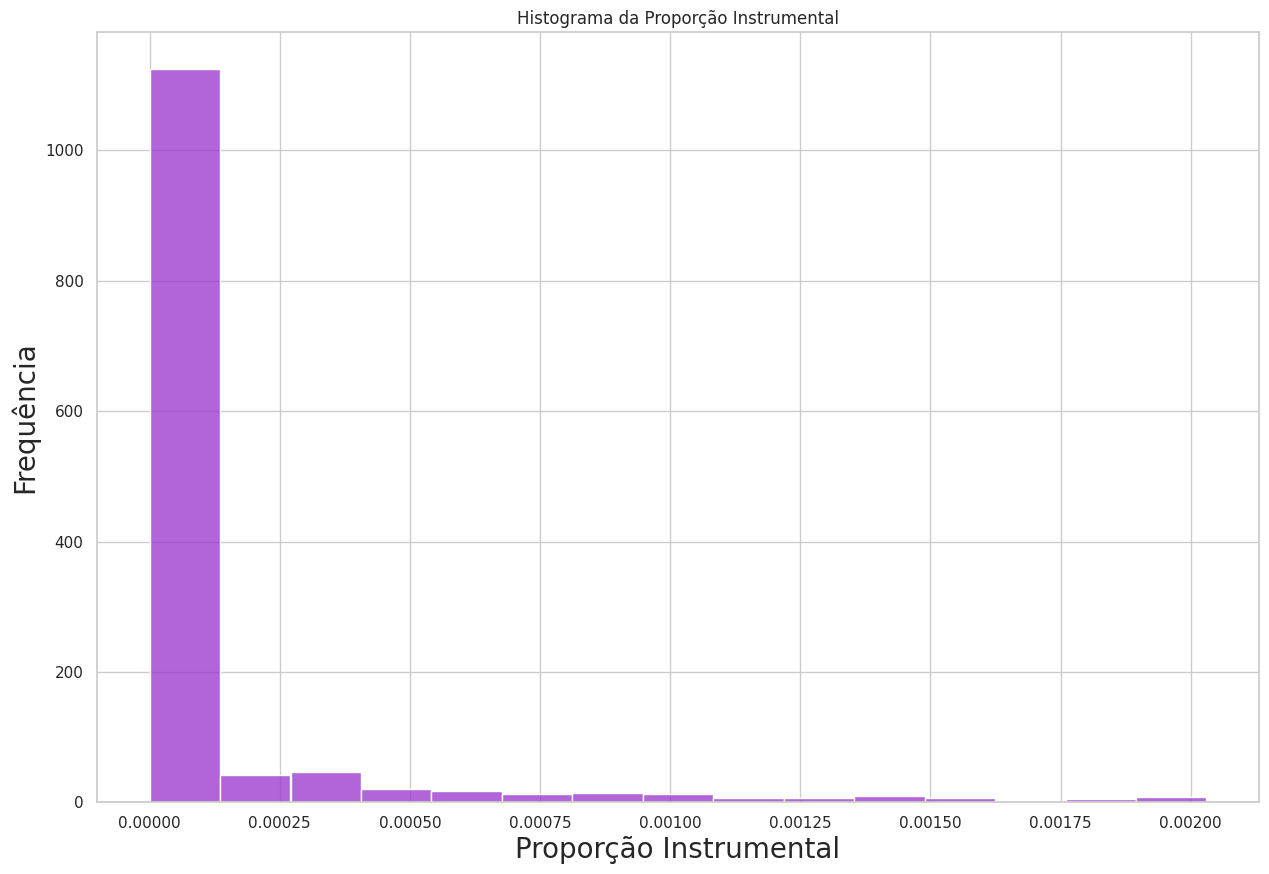

Total de linhas: 1686
Total sem Outliers: 1333


In [ ]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = df['Proporção Instrumental'].quantile(0.25)
Q3 = df['Proporção Instrumental'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

filter = (df['Proporção Instrumental'] >= limite_inferior) & (df['Proporção Instrumental'] <= limite_superior)
df_sem_outliers = df.loc[filter]

# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=df_sem_outliers, x='Proporção Instrumental', bins=15, color='darkorchid')

plt.title('Histograma da Proporção Instrumental')
plt.xlabel('Proporção Instrumental', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

print(f'Total de linhas: {len(df)}')
print(f'Total sem Outliers: {len(df_sem_outliers)}')

Como pode-se ver a exclusão dos outliers ajudou na melhor visualização, com exceção da Proporção Instrumental que ainda ficou bastante concentrada em um ponto bem homogêneo, o que indica que as músicas dessa amostra possuem um nível de instrumental bem similar.

Por fim, para a Análise Descritiva podemos analisar se há correlação entre as variáveis presentes nessa amostra escolhida.

In [ ]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
corr = numerical_df.corr()
# Display the correlation matrix
corr

,Energia,Tempo,Volume (Loudness),Proporção de Fala,Proporção Instrumental,Popularidade da Faixa,Valência
Energia,1.000000,0.114648,0.691149,-0.011051,-0.108612,-0.007536,0.326422
Tempo,0.114648,1.000000,0.062592,0.067297,-0.009404,0.016659,0.002690
Volume (Loudness),0.691149,0.062592,1.000000,0.081270,-0.355674,0.083132,0.234557
Proporção de Fala,-0.011051,0.067297,0.081270,1.000000,-0.103817,-0.137957,0.012267
Proporção Instrumental,-0.108612,-0.009404,-0.355674,-0.103817,1.000000,-0.063107,-0.139672
Popularidade da Faixa,-0.007536,0.016659,0.083132,-0.137957,-0.063107,1.000000,-0.006478
Valência,0.326422,0.002690,0.234557,0.012267,-0.139672,-0.006478,1.000000


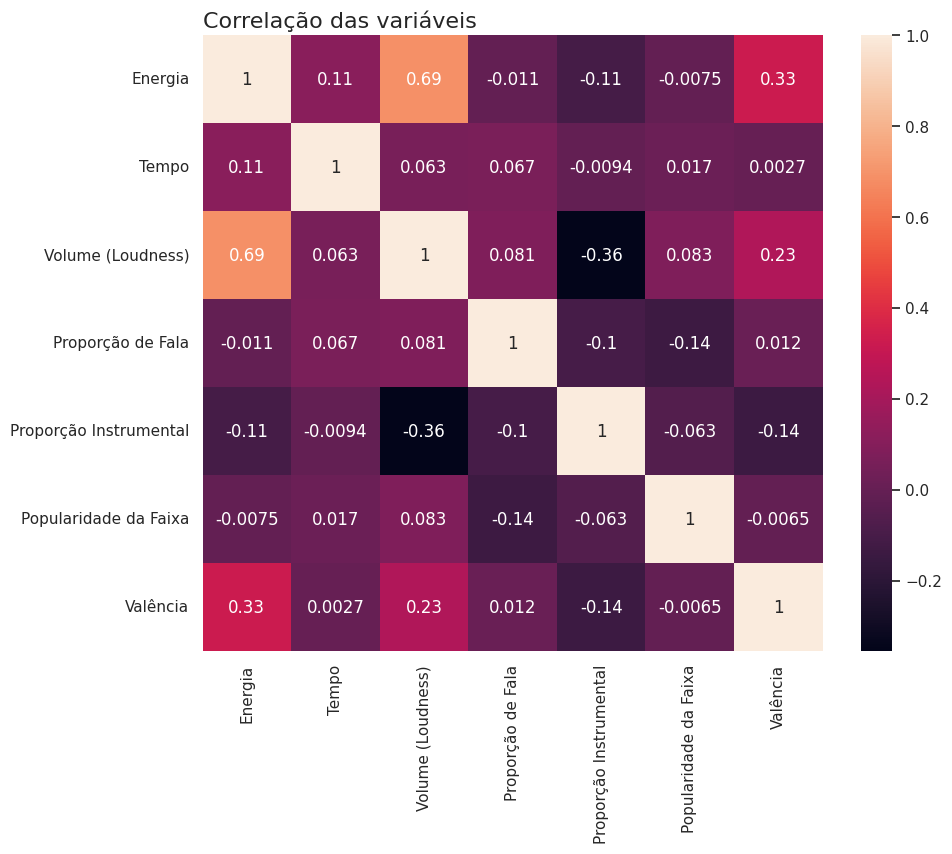

In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

Como pode-se ver as variáveis que possuem a maior correlação é a Energia com o Volume (Loudness), atigindo uma correlação de 69%, implicando que quanto maior a energia de uma música maior será o seu volume. Além disso, pode-se ver uma correlação moderada entre a Energia e a Valência, apesar de apenas totalizar 33%, e entre Valência e Volume (Loudness) de 23%, que não indicam uma correlação tão forte.

Isso pode indicar que apesar de uma música possuir uma positividade, isso não significa que ela vai ser necessariamente mais alta ou mais energética.

Como forma de facilitar as interpretações dos dados serão classificadas as Energias da música em três categorias: `Calma`, `Moderada` e `Energética`.

In [ ]:
def calcular_classes(df, k:int, column:str, frequency_name:str, labels):
    # Obtendo os valores mínimo e máximo da coluna 'renda'
    min_val = df[column].min()
    max_val = df[column].max()

    # Garantindo que k seja um inteiro
    k = int(k)

    # Calculando a amplitude total
    amplitude_total = max_val - min_val

    # Calculando a amplitude de cada classe
    amplitude_classe = amplitude_total / k

    classes_inferiores = []
    classes_superiores = []

    for i in range(k):
        limite_inferior = min_val + i * amplitude_classe
        limite_superior = min_val + (i + 1) * amplitude_classe

        # Ajustando a última classe para garantir que inclua o valor máximo
        if i == k - 1:
            limite_superior = max_val

        classes_inferiores.append(limite_inferior)
        classes_superiores.append(limite_superior)

    print("Limites Inferiores das Classes:", classes_inferiores)
    print("Limites Superiores das Classes:", classes_superiores)

    # Adiciona max_val para incluir o último intervalo
    bins = classes_inferiores + [max_val]
    limit = bins

    # Criando uma nova coluna com as classes
    df[frequency_name] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

    return [df, bins]  # Retornando o DataFrame atualizado

df_classe, _ = calcular_classes(df, 3, 'Energia', 'Classe Energia', labels=['Calma', 'Moderada', 'Energética'])
df_classe

Limites Inferiores das Classes: [0.00161, 0.33107333333333333, 0.6605366666666667]
Limites Superiores das Classes: [0.33107333333333333, 0.6605366666666667, 0.99]


,Energia,Tempo,Volume (Loudness),Proporção de Fala,Proporção Instrumental,Nome da Faixa,Artista da Faixa,Popularidade da Faixa,Valência,Classe Energia
0,0.592,157.969,-7.777,0.0304,0.000000,Die With A Smile,"Lady Gaga, Bruno Mars",100,0.535,Moderada
1,0.507,104.978,-10.171,0.0358,0.060800,BIRDS OF A FEATHER,Billie Eilish,97,0.438,Moderada
2,0.808,108.548,-4.169,0.0368,0.000000,That’s So True,Gracie Abrams,93,0.372,Energética
3,0.910,112.966,-4.070,0.0634,0.000000,Taste,Sabrina Carpenter,81,0.786,Energética
4,0.783,149.027,-4.477,0.2600,0.000000,APT.,"ROSÉ, Bruno Mars",98,0.939,Energética
...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,-7.621,0.0678,0.000013,People,Libianca,76,0.693,Moderada
1682,0.725,105.016,-8.315,0.0941,0.129000,soso,Omah Lay,74,0.530,Energética
1683,0.809,99.005,-5.022,0.0929,0.000000,KANTE (feat. Fave),"Davido, FAVE",69,0.606,Energética
1684,0.642,83.389,-4.474,0.3400,0.000000,WAIT FOR U (feat. Drake & Tems),"Future, Drake, Tems",82,0.339,Moderada


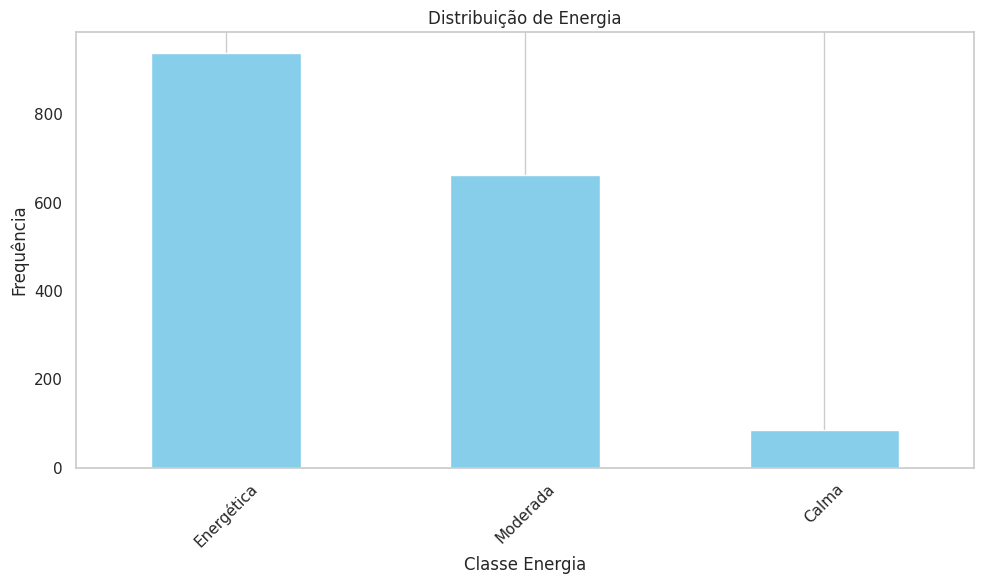

In [ ]:
# Contar a frequência de cada nível de educação
frequencia_energia = df_classe['Classe Energia'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
frequencia_energia.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Energia')
plt.xlabel('Classe Energia')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
musicas_calmas = df_classe.loc[df_classe['Classe Energia'] == 'Calma', ['Classe Energia', 'Popularidade da Faixa']]
musicas_moderadas = df_classe.loc[df_classe['Classe Energia'] == 'Moderada', ['Classe Energia', 'Popularidade da Faixa']]
musicas_energeticas = df_classe.loc[df_classe['Classe Energia'] == 'Energética', ['Classe Energia', 'Popularidade da Faixa']]

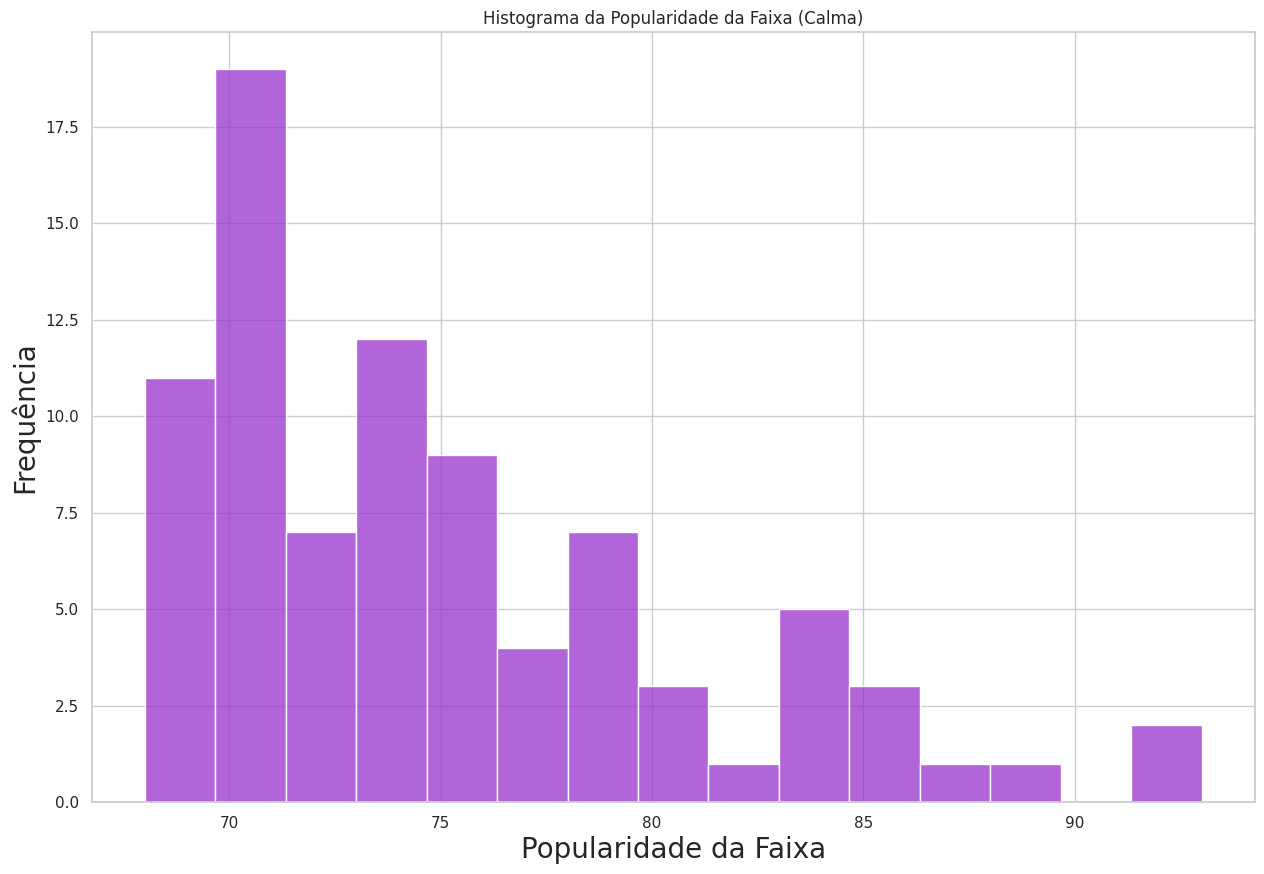

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=musicas_calmas, x='Popularidade da Faixa', bins=15, color='darkorchid')

plt.title('Histograma da Popularidade da Faixa (Calma)')
plt.xlabel('Popularidade da Faixa', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

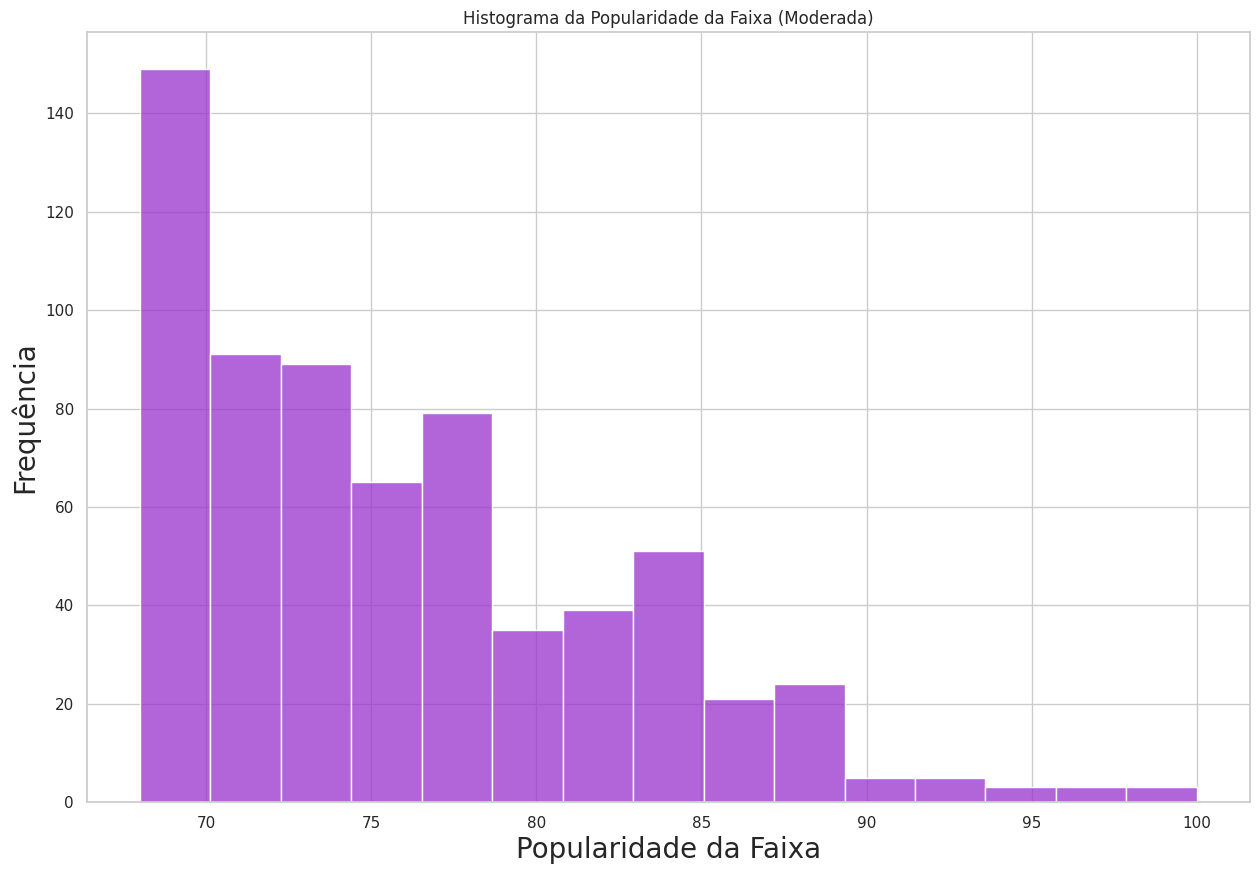

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=musicas_moderadas, x='Popularidade da Faixa', bins=15, color='darkorchid')

plt.title('Histograma da Popularidade da Faixa (Moderada)')
plt.xlabel('Popularidade da Faixa', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

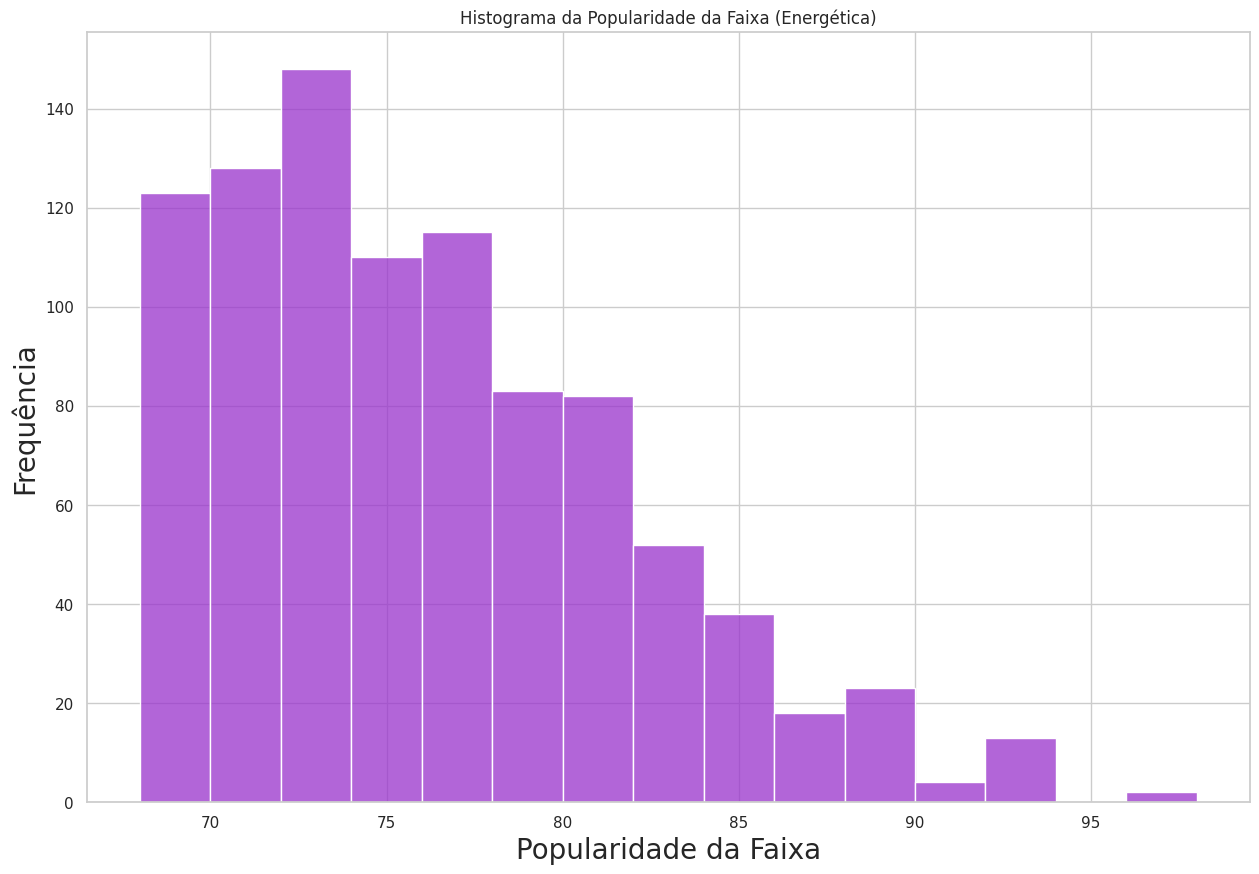

In [ ]:
# Histograma
plt.figure(figsize=(15,10))
sns.histplot(data=musicas_energeticas, x='Popularidade da Faixa', bins=15, color='darkorchid')

plt.title('Histograma da Popularidade da Faixa (Energética)')
plt.xlabel('Popularidade da Faixa', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.show()

# Proposição de Hipótese

**Hipótese Nula (H0):** "Não há diferença significativa na popularidade média entre músicas com diferentes níveis de energia (`Calma`, `Moderada` ou `Energética`).".

**Hipótese Alternativa (H1):** "Há uma diferença significativa na popularidade média entre músicas com diferentes níveis de energia (`Calma`, `Moderada` ou `Energética`)".





# Teste de Hipóteses

O teste escolhido para esse tipo de hipótese será a ANOVA, pois serão comparados os níveis de Popularidade das músicas, com as suas categorias de Energia a qual subdivide em três amostras independentes.

<ipython-input-50-f14012637f16>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby("Classe Energia")["Popularidade da Faixa"].agg(["count", "mean", "std"]).reset_index()


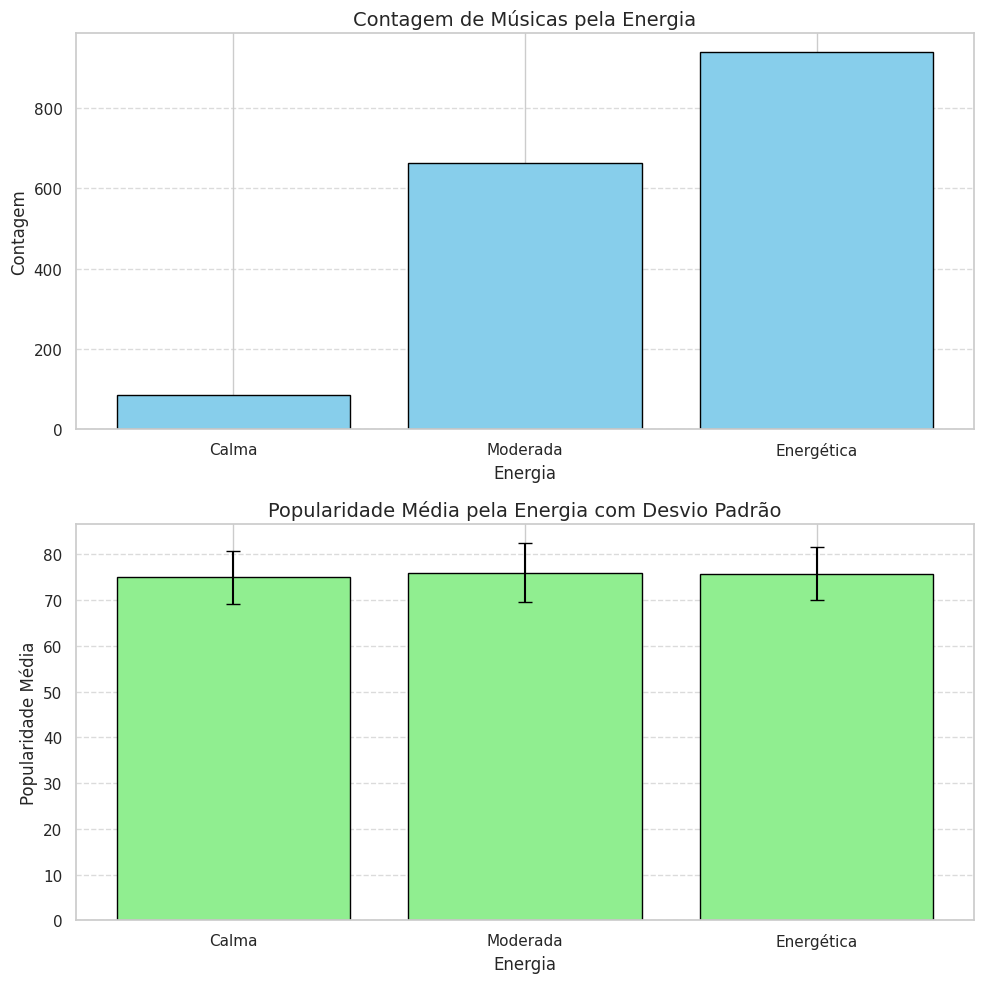

In [ ]:
group_stats = df.groupby("Classe Energia")["Popularidade da Faixa"].agg(["count", "mean", "std"]).reset_index()

# Estatística para visualização
categories = group_stats["Classe Energia"]
counts = group_stats["count"]
means = group_stats["mean"]
std_devs = group_stats["std"]

# Subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de coluna por contagem por raça
axs[0].bar(categories, counts, color='skyblue', edgecolor='black')
axs[0].set_title('Contagem de Músicas pela Energia', fontsize=14)
axs[0].set_ylabel('Contagem', fontsize=12)
axs[0].set_xlabel('Energia', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico édia de Idade com desvio padrão
axs[1].bar(categories, means, yerr=std_devs, capsize=5, color='lightgreen', edgecolor='black')
axs[1].set_title('Popularidade Média pela Energia com Desvio Padrão', fontsize=14)
axs[1].set_ylabel('Popularidade Média', fontsize=12)
axs[1].set_xlabel('Energia', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [ ]:
calmas = musicas_calmas['Popularidade da Faixa']
moderadas = musicas_moderadas['Popularidade da Faixa']
energeticas = musicas_energeticas['Popularidade da Faixa']

stats.f_oneway(calmas, moderadas, energeticas)


F_onewayResult(statistic=1.2621064761625616, pvalue=0.2833249096551048)

Os resultados dos testes sendo `Estatística F = 1.2621` e `valor-p = 0.2833`, indicam que não pode-se rejeitar a hipótese nula ao nível de significância geralmente utilizado, que é `0.05`. Portanto, não há diferença significativa entre os grupos de Energia na média de Popularidade das músicas.

- **Estatística F:** A razão entre a variabilidade entre os grupos e a variabilidade dentro dos grupos. Um valor de F mais alto sugere que as médias dos grupos são significativamente diferentes.
- **Valor-p:** Probabilidade de observar a diferença entre as médias dos grupos se a hipótese nula for verdadeira.

# Análise de Regressão

## Regressão Linear Simples
- Variável independente: `Volume (Loudness)`
- Variável dependente: `Energia`

A ideia dessa análise é ver se quanto maior o volume de uma música, maior será a sua energia.


In [13]:
# Calculando IQR, limites superior e inferior e desvio padrão
Q1 = df['Volume (Loudness)'].quantile(0.25)
Q3 = df['Volume (Loudness)'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

filter = (df['Volume (Loudness)'] >= limite_inferior) & (df['Volume (Loudness)'] <= limite_superior)
df_sem_outliers = df.loc[filter]

X_Simples = df_sem_outliers[['Volume (Loudness)']]
Y = df_sem_outliers['Energia']

X_train, X_test, y_train, y_test = train_test_split(X_Simples, Y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred = model_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)

print("\nRegressão Linear Simples")
print("Coeficiente Angular (w1):", model_simple.coef_[0])
print("Intercepto (w0):", model_simple.intercept_)
print("Erro Quadrático Médio (MSE):", mse_simple)
print("Coeficiente de Determinação (R^2):", r2_simple)


Regressão Linear Simples
Coeficiente Angular (w1): 0.04771394390915025
Intercepto (w0): 0.9806005250673041
Erro Quadrático Médio (MSE): 0.01811524342219018
Coeficiente de Determinação (R^2): 0.31788483155650293


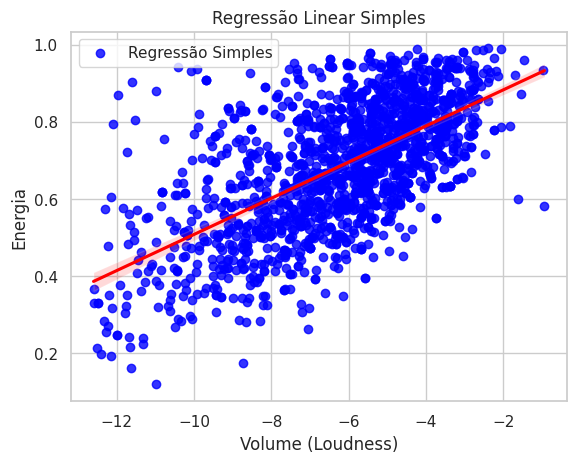

In [14]:
# Visualizando os resultados
sns.regplot(
    x=df_sem_outliers["Volume (Loudness)"],
    y=df_sem_outliers["Energia"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
    label="Regressão Simples"
)
plt.title("Regressão Linear Simples")
plt.xlabel("Volume (Loudness)")
plt.ylabel("Energia")
plt.legend()
plt.show()

Explicando os resultados, pode-se observar que o `Coeficiente Angular` é positivo, confirmando a relação de que quanto maior o volume de uma música, maior seria a sua energia, ou seja, a sua rapidez e se é barulhenta.

O intercepto (W0) indica que quando o volume chega próximo de 0, a energia está bem próxima da energia máxima que uma música pode ter (que no caso é 1.0). Isso ocorre porque o som é medido em uma escala negativa, onde o pico da escala é próximo do 0, o que condiz com o comportamento.

Já o R² (Coeficiente de Determinação) não é muito próximo de 1.0 para indicar que esse modelo está bem ajustado. Se fossem utilizadas mais variáveis independentes talvez a relação seria melhor vista, como Volume e Tempo (em BPM) e a Energia das músicas.


## Regressão Múltipla
- Variáveis independentes: Volume e Tempo (BPM);
- Variável dependente: Energia
A ideia dessas variáveis é obter um melhor Coeficiente de Determinação, com base em mais uma variável para induzir que quanto maior o Volume e Tempo (BPM) de uma música, maior seria a sua Energia.

In [15]:
X_Multiplo = df_sem_outliers[['Volume (Loudness)', 'Tempo']]
Y = df_sem_outliers['Energia']

X_train, X_test, y_train, y_test = train_test_split(X_Multiplo, Y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Fazendo previsões
y_pred = model_multiple.predict(X_test)

# Avaliando o modelo
mse_multiple = mean_squared_error(y_test, y_pred)
r2_multiple = r2_score(y_test, y_pred)

print("\nRegressão Linear Múltipla")
print("Coeficientes:", model_multiple.coef_)
print("Intercepto (w0):", model_multiple.intercept_)
print("Erro Quadrático Médio (MSE):", mse_multiple)
print("Coeficiente de Determinação (R^2):", r2_multiple)


Regressão Linear Múltipla
Coeficientes: [0.04741683 0.0004018 ]
Intercepto (w0): 0.9300354588128551
Erro Quadrático Médio (MSE): 0.017780148492602458
Coeficiente de Determinação (R^2): 0.3305025661909875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


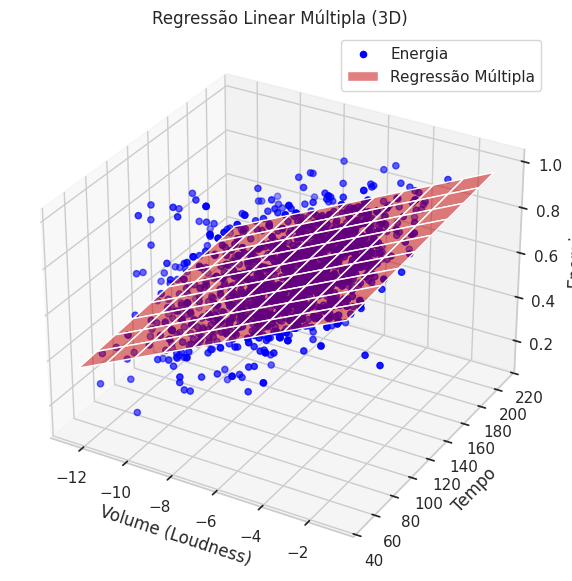

In [16]:

# Visualizando os resultados em 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sem_outliers["Volume (Loudness)"], df_sem_outliers["Tempo"], df_sem_outliers["Energia"], color='blue', label='Energia')

# Criando uma superfície para visualização
def predict_surface(model, X, feature1, feature2):
    x = np.linspace(X[feature1].min(), X[feature1].max(), 10)
    y = np.linspace(X[feature2].min(), X[feature2].max(), 10)
    xx, yy = np.meshgrid(x, y)
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, zz

xx, yy, zz = predict_surface(model_multiple, df_sem_outliers, "Volume (Loudness)", "Tempo")
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, label='Regressão Múltipla')

ax.set_xlabel("Volume (Loudness)")
ax.set_ylabel("Tempo")
ax.set_zlabel("Energia")
plt.title("Regressão Linear Múltipla (3D)")
plt.legend()
plt.show()

Explicando os resultados dessa regressão múltipla, pode-se observar que o Coeficiente Angular do Tempo é mais baixo do que a variável utilizada anteriormente, indicando que ele não tem uma relação positiva tão forte com a energia de uma música.

Além disso, o intercepto deu um valor ligeiramente menor, mas ainda próximo de 1, indicando que quando o Volume (Loudness) e o Tempo se aproximam de 0, a Energia se aproxima do seu valor máximo, o que deve ocorrer em razão do Volume ser uma escala negativa, e do tempo ser uma escala positiva. Para resolver isso poderia-se utilizar uma escala intermediária para interpretar melhor essa relação entre os dois, em próximas análises.

Além disso, o R² aumentou de uma forma ligeira ao adicionar a variável do Tempo, indicando que o modelo ainda assim não estaria bem ajustado.